In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide="ignore", invalid="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# 2.2.2

$$
\lim_{K→∞} 1/K ∑_{k=1}^K f(x^{(k)}) = \frac{1}{b-a} \int_a^b{f(x)dx} \tag{2.3}
$$

$ f(x)=\sqrt{1-x^2} $ and $a=0,b=1$ so $(2.3)=π/4$

In [22]:
np.pi/4

0.7853981633974483

In [42]:
K = 1_000
x = np.random.rand(K)
f = np.sqrt(1-x**2)

f.sum()/K

0.7812167529034995

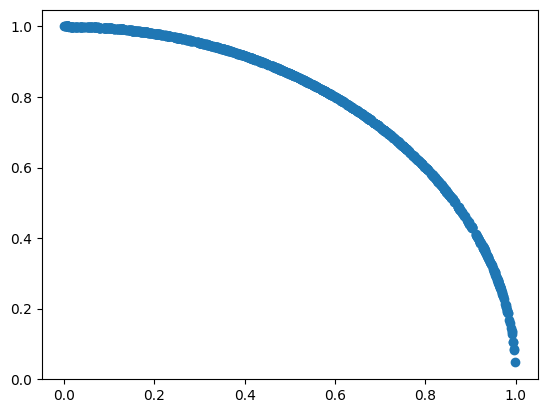

In [43]:
plt.scatter(x, f)

# 2.2.3 Importance sampling

$$ \frac{1}{\sqrt{2π}} e^{-\frac{x^2}{2}}$$

$σ=1$ $μ=0$

$$ f = ∫_{-a}^a \frac{1}{\sqrt{2π}} e^{-\frac{x^2}{2}} dx $$

In [309]:
from scipy.stats import norm

In [310]:
np.set_printoptions(formatter={"float": lambda x: f"{x:12.3f}"})
np.logspace(np.log10(2), 4, 5)

array([       2.000,       16.818,      141.421,     1189.207,
          10000.000])

In [358]:
aa = np.logspace(0.3, 5, 6)[:, None]
N = 100_000

x = np.random.rand(len(aa), N) * 2 * aa - aa
fx = 1 / np.sqrt(2 * np.pi) * np.exp(-(x**2) / 2)
f_acc = np.cumsum(fx, axis=1) / N * 2 * aa
eff = np.sum(fx > 1e-6, axis=1)

for i, [a] in enumerate(aa):
    f = f_acc[i, -1]
    x0, x1 = norm.cdf([-a, a])

    print(f"{a=:<12.1f} mc:{f:12.6f} exact:{x1 - x0:12.6f} eff:{eff[i]/N:12.6f} {eff[i]}")

# as a grows the gaussian peak becomes narrower and more difficult to catch
# most of the sample a completely useless

a=2.0          mc:    0.956529 exact:    0.953986 eff:    1.000000 100000
a=17.4         mc:    0.989370 exact:    1.000000 eff:    0.292530 29253
a=151.4        mc:    1.002252 exact:    1.000000 eff:    0.033600 3360
a=1318.3       mc:    0.996746 exact:    1.000000 eff:    0.004070 407
a=11481.5      mc:    1.059195 exact:    1.000000 eff:    0.000420 42
a=100000.0     mc:    0.867649 exact:    1.000000 eff:    0.000050 5


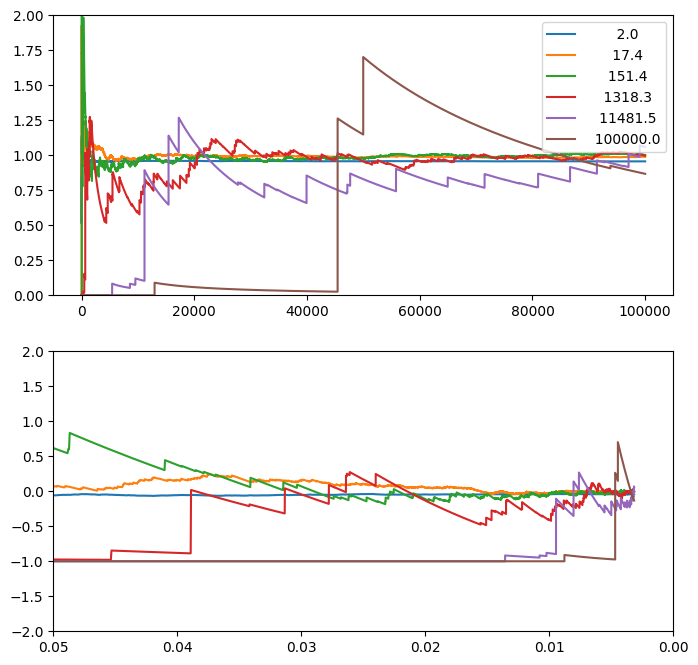

In [359]:
k = np.arange(N)
y = np.cumsum(fx, axis=1)
NN = np.mgrid[:len(aa), :N][1]
K_inv_sq = 1 / np.sqrt(NN)
f = (y/NN*2*aa)

fig, [ax, ax1] = plt.subplots(2, 1, figsize=(8, 8))
ax.set(ylim=[0, 2])
ax.plot(NN.T, f.T, label=[f"{x:10.1f}" for x in aa[:, 0]])
ax.legend()

ax1.set(xlim=[0.05, 0], ylim=[-2, 2])
ax1.plot(K_inv_sq.T, (f.T-1));